# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 1384 Найдёнова Елена, Прошичев Александр и Шушков Егор. Вариант №10.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения






####Дискретное преобразование Фурье
Пусть последовательность отсчётов ${x_k}$ является периодической с периодом N:

$x_{k+N} = x_k \; \forall k$

Рассмотрим фрагмент последовательности ${x_k}$ от 0 до $N-1$, составляющий N отсчётов.

Тогда дискретным преобразованием Фурье (ДПФ) будем называть выражение

$ X(n) = \displaystyle \sum_{k=0}^{N - 1} x_k e^{-i \frac{2 \pi n}{N}k}$ при $n = 0...N-1$

Спектром дискретного сигнала будем называть

$S(\omega) = \displaystyle \sum_{k=- \infty}^{\infty} x_k e^{-i \omega k}$

Формула связи ДПФ и спектра дискретного сигнала (вычисление дискретных отсчётов спектра дисктретного сигнала с помощью ДПФ)

$X(n) = S(\frac{2 \pi n}{N}) = S(w_d \frac{n}{N}), \: T = 1$

\\

####Полиномиальное сглаживание

Для заданного дискретного сигнала $x_n$ последовательность, описывающая выходной сигнал нерекурсивного фильтра, в общем случае выглядит следующим образом:

$y_n = \sum_{k=0}^M c_k x_{n-k}$

где M - размер окна в котором производится фильтрация.

\\

####Линейное сглаживание по $(2h + 1)$-точкам
В случае линейного сглаживания нерекурсивный фильтр будет выглядить, как $y(t) = A + Bt$, а его передаточная функция - как

$ \tilde{H}_{2h + 1}(f) =  \cfrac{1}{(2h + 1)}  \cfrac{\sin(2 \pi f(h + \frac{1}{2}))}{\sin(\pi f)}$

Тогда при сглаживании по 5 точкам его можно представить, как

$ y_n = \frac{1}{5} (s_{n - 2} + s_{n - 1} + s_{n} + s_{n + 1} + s_{n + 2}) $

А при сглаживании по 9 точкам - как

$ y_n = \frac{1}{9} (s_{n - 4} + s_{n - 3} + s_{n - 2} + s_{n - 1} + s_{n} + s_{n + 1} + s_{n + 2} + s_{n + 3} + s_{n + 4}) $

\\

####Сглаживание полиномом 2 степени по $(2h + 1)$-точкам
В случае сглаживания полиномом 2 степени нерекурсивный фильтр будет выглядить, как $y(t) = A + Bt + Ct^2$, а его передаточная функция - как

$ \tilde{H}_{2h + 1}(f) =  \cfrac{3}{8h^3 + 12 h^2 -2h - 3}  \left( (-3h^2 - 3h + 1) + 2\displaystyle \sum_{k=1}^{k=h} (5k^2 - 3h^2 - 3h + 1) \cos(2 \pi f k) \right) $

Тогда при сглаживании по 5 точкам его можно представить, как

$ y_n = \frac{1}{35} (-3s_{n - 2} + 12s_{n - 1} + 17s_{n} + 12s_{n + 1} - 3s_{n + 2}) $

А при сглаживании по 9 точкам - как

$ y_n = \frac{1}{231} (-21s_{n - 4} + 14s_{n - 3} + 39s_{n - 2} + 54s_{n - 1} + 59s_{n} + 54s_{n + 1} + 39s_{n + 2} + 14s_{n + 3} - 21s_{n + 4}) $

\\

####Сглаживание полиномом 4 степени по $(2h + 1)$-точкам
В случае сглаживания полиномом 4 степени нерекурсивный фильтр будет выглядить, как $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$, а его передаточная функция - как

$ \tilde{H}_{2h + 1}(f) =   \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \left(15h^4 + 30h^3 - 35h^2 - 50h + 12 + 2\displaystyle \sum_{k=1}^{k=h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4) \cos(2 \pi f k) \right) $

Тогда при сглаживании по 7 точкам его можно представить, как

$ y_n = \frac{1}{231} (5s_{n - 3} - 30s_{n - 2} + 75s_{n - 1} + 131s_{n} + 75s_{n + 1} - 30s_{n + 2} + 5s_{n + 3}) $

А при сглаживании по 11 точкам - как

$ y_n = \frac{1}{429} (18s_{n - 4} - 45s_{n - 4} - 10s_{n - 3} + 60s_{n - 2} + 120s_{n - 1} + 143s_{n} + 120s_{n + 1} + 60s_{n + 2} - 10s_{n + 3} - 45s_{n + 4} + 18s_{n + 5}) $

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [ ]:
N = 31  # количество отсчетов
T = 1   # шаг дискретизации
t = np.arange(N+1) * T  # временные отсчеты

frequencies = np.arange(0, 1.1, 0.1) * np.pi  # 11 гармоник

amplitudes = np.random.randint(1, 12, size=len(frequencies))
amplitudes = amplitudes / np.sum(amplitudes)

phases = np.random.uniform(0, 0.5, size=len(frequencies))

# Формирование дизкретизированного сигнала
signal = np.zeros(N+1)
for i in range(len(frequencies)):
    signal += amplitudes[i] * np.cos(frequencies[i] * t + phases[i])

t_analog = np.linspace(0, N*T, 1000)  # для аналогового сигнала
analog_signal = np.zeros(len(t_analog))
for i in range(len(frequencies)):
    analog_signal += amplitudes[i] * np.cos(frequencies[i] * t_analog + phases[i])

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

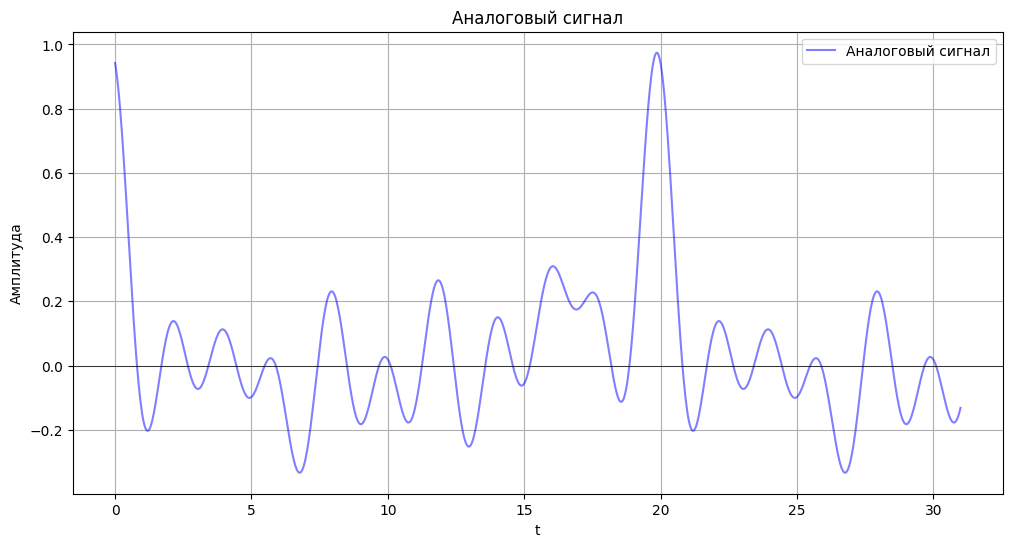

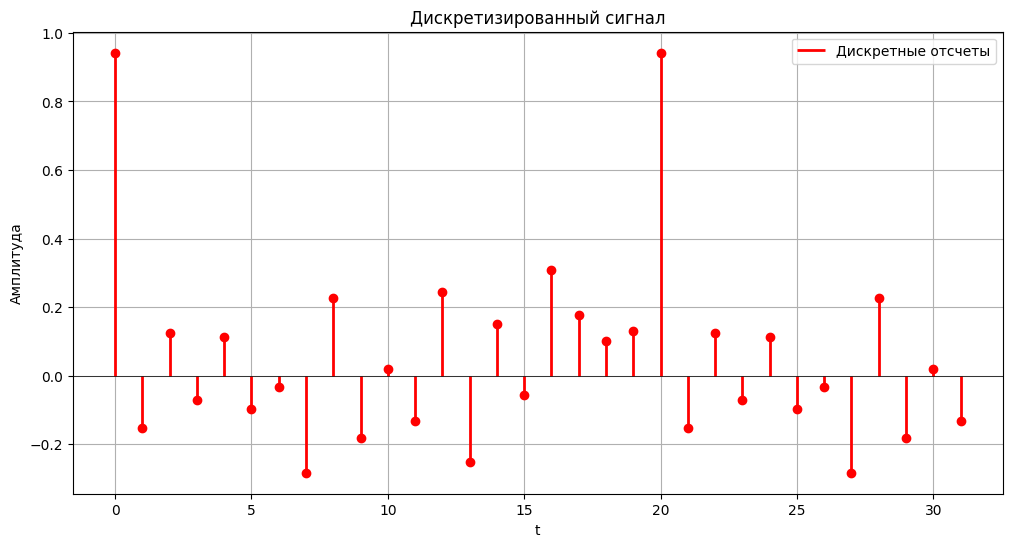

In [ ]:
import matplotlib.pyplot as plt

# Предположим, что t_analog, analog_signal, t и signal уже определены

# График аналогового сигнала
plt.figure(figsize=(12, 6))
plt.plot(t_analog, analog_signal, 'b-', label='Аналоговый сигнал', alpha=0.5)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Амплитуда')
plt.title('Аналоговый сигнал')
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

# График дискретного сигнала
plt.figure(figsize=(12, 6))
plt.vlines(t, [0]*len(t), signal, 'r', linewidth=2, label='Дискретные отсчеты')
plt.plot(t, signal, 'ro')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Амплитуда')
plt.title('Дискретизированный сигнал')
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.show()


### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


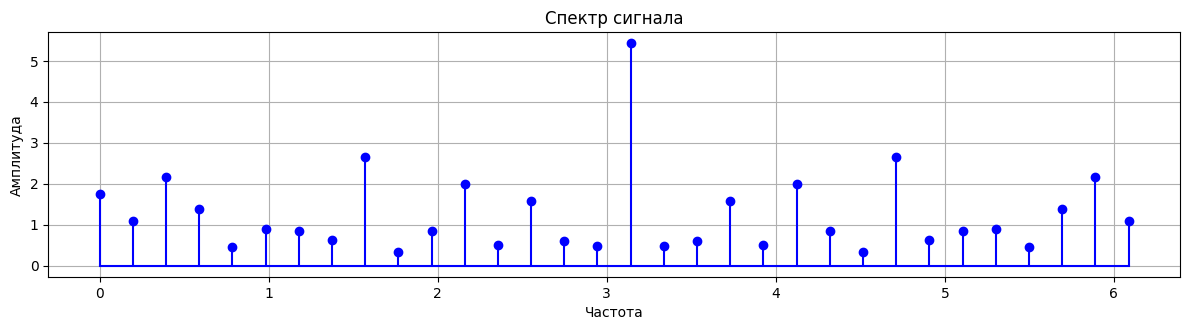

In [ ]:
# Дискретное преобразование Фурье
spectrum = np.fft.fft(signal)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum), linefmt='b-', markerfmt='bo', basefmt='b-')
plt.title('Спектр сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()

plt.tight_layout()
plt.show()

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формула передаточной функции $H( \omega )$ при линейном сглаживании для 5 и 9 точек соотвественно.

$ \tilde{H}_{5}(f) =  \cfrac{1}{5}  \cfrac{\sin(5 \pi f))}{\sin(\pi f)}$

$ \tilde{H}_{9}(f) =  \cfrac{1}{9}  \cfrac{\sin(9 \pi f))}{\sin(\pi f)}$

In [ ]:
# Сглаживание по 5 точкам
def smooth_5_points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    smoothed[0:2] = signal[0:2]
    smoothed[-2:] = signal[-2:]

    for n in range(2, N-2):
        smoothed[n] = (1/5) * (signal[n-2] + signal[n-1] + signal[n] +
                            signal[n+1] + signal[n+2])
    return smoothed

# Сглаживание по 9 точкам
def smooth_9_points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    smoothed[0:4] = signal[0:4]
    smoothed[-4:] = signal[-4:]

    for n in range(4, N-4):
        smoothed[n] = (1/9) * (signal[n-4] + signal[n-3] + signal[n-2] +
                            signal[n-1] + signal[n] + signal[n+1] +
                            signal[n+2] + signal[n+3] + signal[n+4])
    return smoothed

signal_smooth_5 = smooth_5_points(signal)
signal_smooth_9 = smooth_9_points(signal)

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

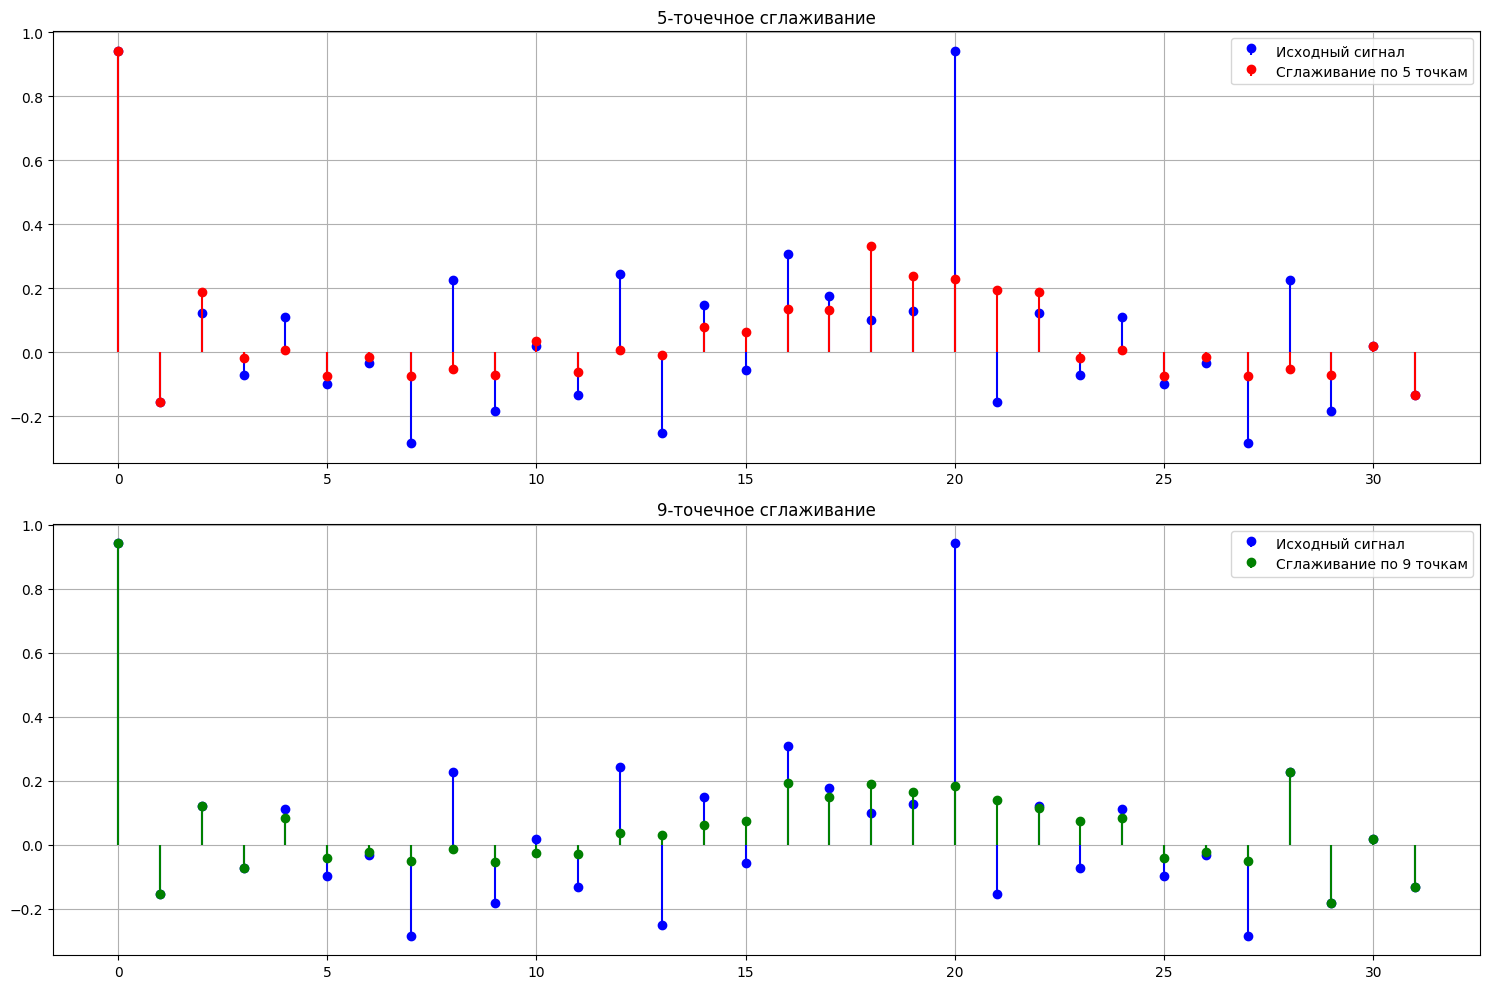

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_5, 'r', label='Сглаживание по 5 точкам', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('5-точечное сглаживание')

plt.subplot(2, 1, 2)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_9, 'g', label='Сглаживание по 9 точкам', markerfmt='go', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('9-точечное сглаживание')

plt.tight_layout()
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

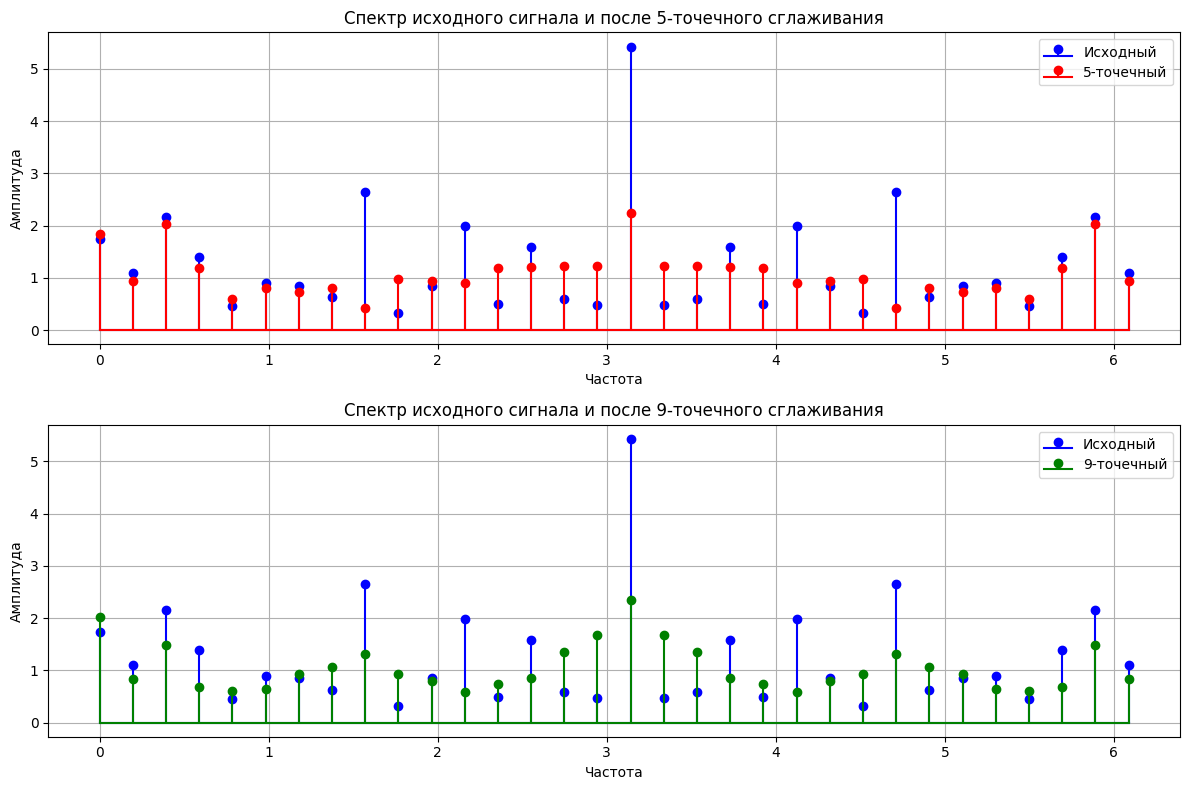

In [ ]:
# Дискретное преобразование Фурье
spectrum_original = np.fft.fft(signal)
spectrum_5 = np.fft.fft(signal_smooth_5)
spectrum_9 = np.fft.fft(signal_smooth_9)

plt.figure(figsize=(12, 8))

# Спектр с 5-точечным сглаживанием
plt.subplot(2, 1, 1)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_5), linefmt='r-', markerfmt='ro', basefmt='r-', label='5-точечный')
plt.title('Спектр исходного сигнала и после 5-точечного сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

# Спектр с 9-точечным сглаживанием
plt.subplot(2, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_9), linefmt='g-', markerfmt='go', basefmt='g-', label='9-точечный')
plt.title('Спектр исходного сигнала и после 9-точечного сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Для проведения анализа построим график передаточной функции ${H}(\omega)$ для линейного сглаживания дискретного сигнала

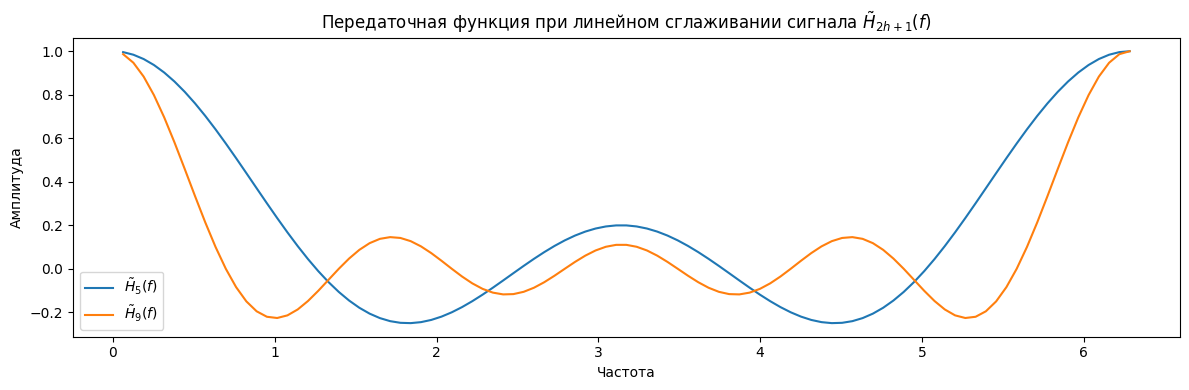

In [ ]:
def H_1(w, h):
  return 1 / (2 * h + 1) * np.sin(w * (h + 1/2)) / np.sin(w / 2)

w = np.linspace(0, 2 * math.pi, 100) #диапазон частот

plt.figure(figsize=(12, 4))

for i in [2, 4]:
  plt.plot(w, H_1(w, i), label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('Частота')

plt.tight_layout()
plt.legend()
plt.show()

Как можно увидеть, график передаточной функции описывает процесс фильтрации с последующим разложением в спектр дисктретного сигнала. Нулевые частоты и близкие к ним не подавляются или подавляются незначительно. Однако при высокочастотном сигнале происходит некоторое аномальное колебание, которое соответствует явлению Гиббса.   

### Задание 8
Повторить п. 4–7 для следующих фильтров:
- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Для дискретного сигнала применить сглаживание 2-ой степени по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

$ \tilde{H}_{5}(f) = \cfrac{3}{105} \left( -17 + 2 \displaystyle \sum_{k=1}^{k=2} (5k^2 - 17) \cos(2 \pi f k) \right)  $


$ \tilde{H}_{9}(f) = \cfrac{1}{231}  \left( -59 + 2\displaystyle \sum_{k=1}^{k=4} (5k^2 + 59) \cos(2 \pi f k) \right) $

In [ ]:
def smooth_poly2_5points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 5-точечного полиномиального сглаживания
    c = np.array([-3, 12, 17, 12, -3]) / 35

    smoothed[0:2] = signal[0:2]
    smoothed[-2:] = signal[-2:]

    for n in range(2, N-2):
        smoothed[n] = np.sum(c * signal[n-2:n+3])
    return smoothed

def smooth_poly2_9points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 9-точечного полиномиального сглаживания
    c = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231

    smoothed[0:4] = signal[0:4]
    smoothed[-4:] = signal[-4:]

    for n in range(4, N-4):
        smoothed[n] = np.sum(c * signal[n-4:n+5])
    return smoothed

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

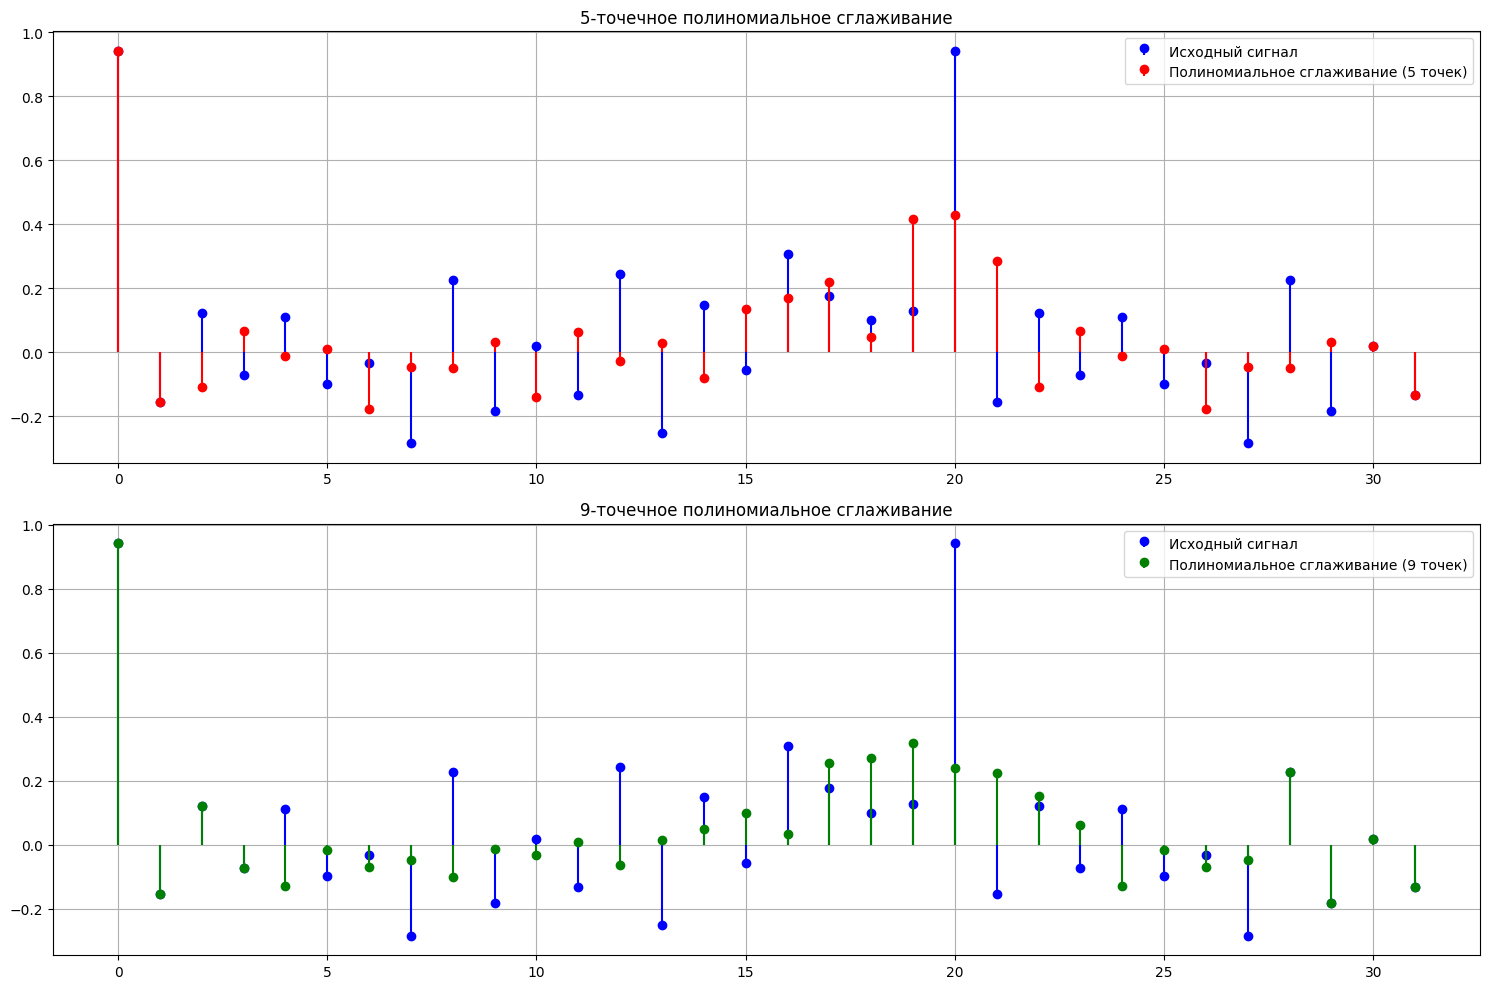

In [ ]:
# Применяем сглаживание
signal_smooth_poly5 = smooth_poly2_5points(signal)
signal_smooth_poly9 = smooth_poly2_9points(signal)

# Временная область
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_poly5, 'r', label='Полиномиальное сглаживание (5 точек)', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('5-точечное полиномиальное сглаживание')

plt.subplot(2, 1, 2)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_poly9, 'g', label='Полиномиальное сглаживание (9 точек)', markerfmt='go', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('9-точечное полиномиальное сглаживание')

plt.tight_layout()
plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

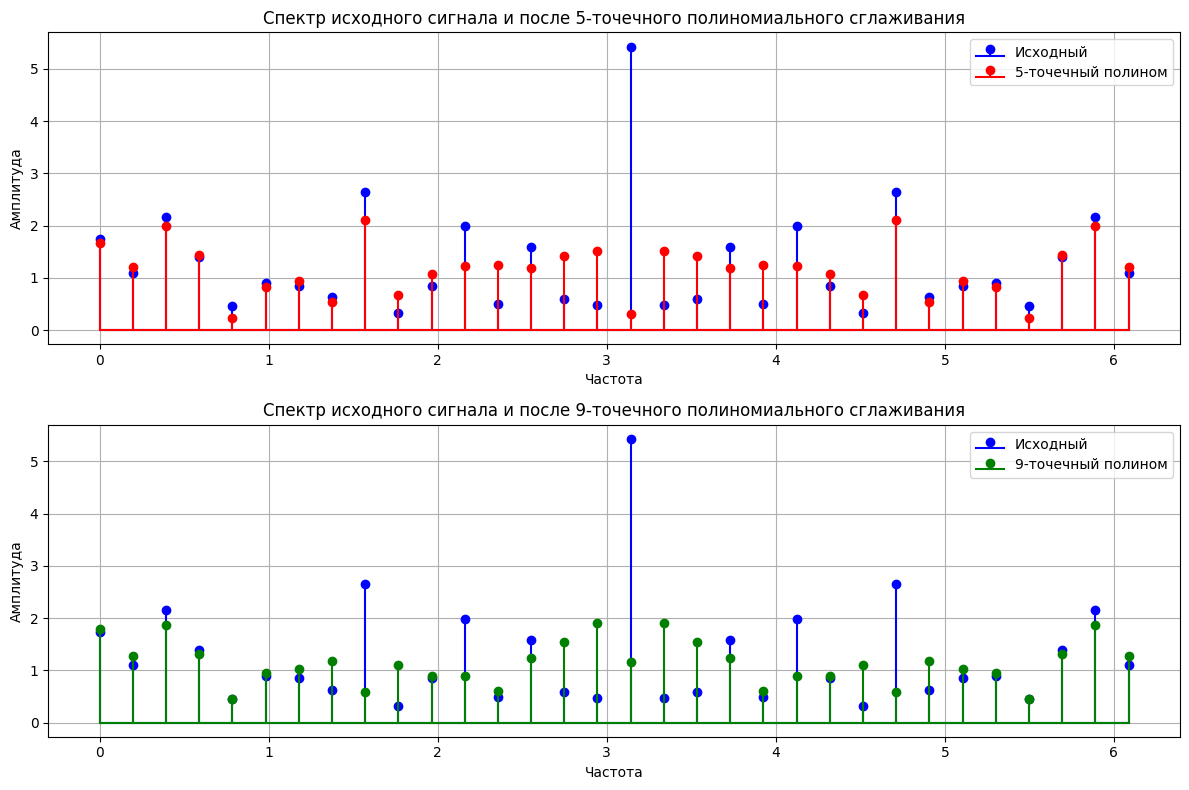

In [ ]:
spectrum_poly5 = np.fft.fft(signal_smooth_poly5)
spectrum_poly9 = np.fft.fft(signal_smooth_poly9)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_poly5), linefmt='r-', markerfmt='ro', basefmt='r-', label='5-точечный полином')
plt.title('Спектр исходного сигнала и после 5-точечного полиномиального сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_poly9), linefmt='g-', markerfmt='go', basefmt='g-', label='9-точечный полином')
plt.title('Спектр исходного сигнала и после 9-точечного полиномиального сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Для проведения анализа построим график передаточной функции ${H}(\omega)$ для сглаживания 2-ой степени дискретного сигнала

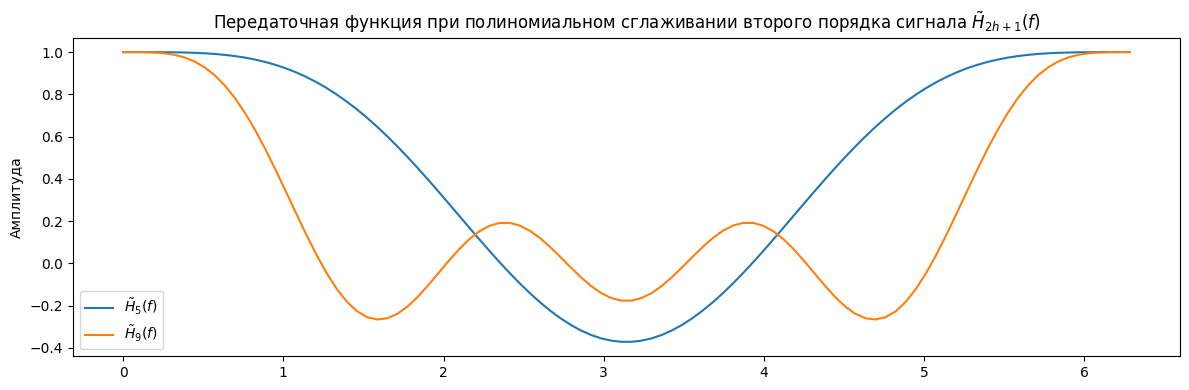

In [ ]:
def H_2(w, h):
  res = -3 * h ** 2 - 3 * h + 1

  for k in range(1, h + 1):
      res = res + 2 * (5*k ** 2 - 3 * h ** 2 - 3 * h + 1) * math.cos(w * k)

  return 3 / (-8 * h ** 3 - 12 * h ** 2 + 2 * h + 3) * res

plt.figure(figsize=(12, 4))

for i in [2, 4]:
  plt.plot(w, [H_2(w_i, i) for w_i in w], label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при полиномиальном сглаживании второго порядка сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()

Как можно увидеть, график передаточной функции описывает процесс фильтрации с последующим разложением в спектр дисктретного сигнала. Нулевые частоты и близкие к ним не подавляются или подавляются незначительно, поэтому низкочастотные сигналы проходят через фильтр практически без изменений. Однако при высокочастотном сигнале происходит сильное подавление. Также при 9 точках появляются колебания, которые соответствуют явлению Гиббса.   

Для дискретного сигнала применить сглаживание 4-ой степени по 7-ти и 11-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

$ \tilde{H}_{7}(f) = \cfrac{15}{40860} \left( 1572 + 2 \displaystyle \sum_{k=1}^{k=3} (1572 - 735 k^2 + 63 k^4) \cos(2 \pi f k) \right) $

$ \tilde{H}_{11}(f) = \cfrac{1}{540540} \left(12012 + \displaystyle \sum_{k=1}^{k=5} (12012 - 1995k^2 + 63k^4) \cos(2 \pi f k) \right) $

In [ ]:
def smooth_poly4_7points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 7-точечного полиномиального сглаживания 4-й степени
    c = np.array([5, -30, 75, 131, 75, -30, 5]) / 231

    smoothed[0:3] = signal[0:3]
    smoothed[-3:] = signal[-3:]

    for n in range(3, N-3):
        smoothed[n] = np.sum(c * signal[n-3:n+4])
    return smoothed

def smooth_poly4_11points(signal):
    N = len(signal)
    smoothed = np.zeros(N)

    # Коэффициенты для 11-точечного полиномиального сглаживания 4-й степени
    c = np.array([-36, 9, 44, 69, 84, 89, 84, 69, 44, 9, -36]) / 429

    smoothed[0:5] = signal[0:5]
    smoothed[-5:] = signal[-5:]

    for n in range(5, N-5):
        smoothed[n] = np.sum(c * signal[n-5:n+6])
    return smoothed


Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

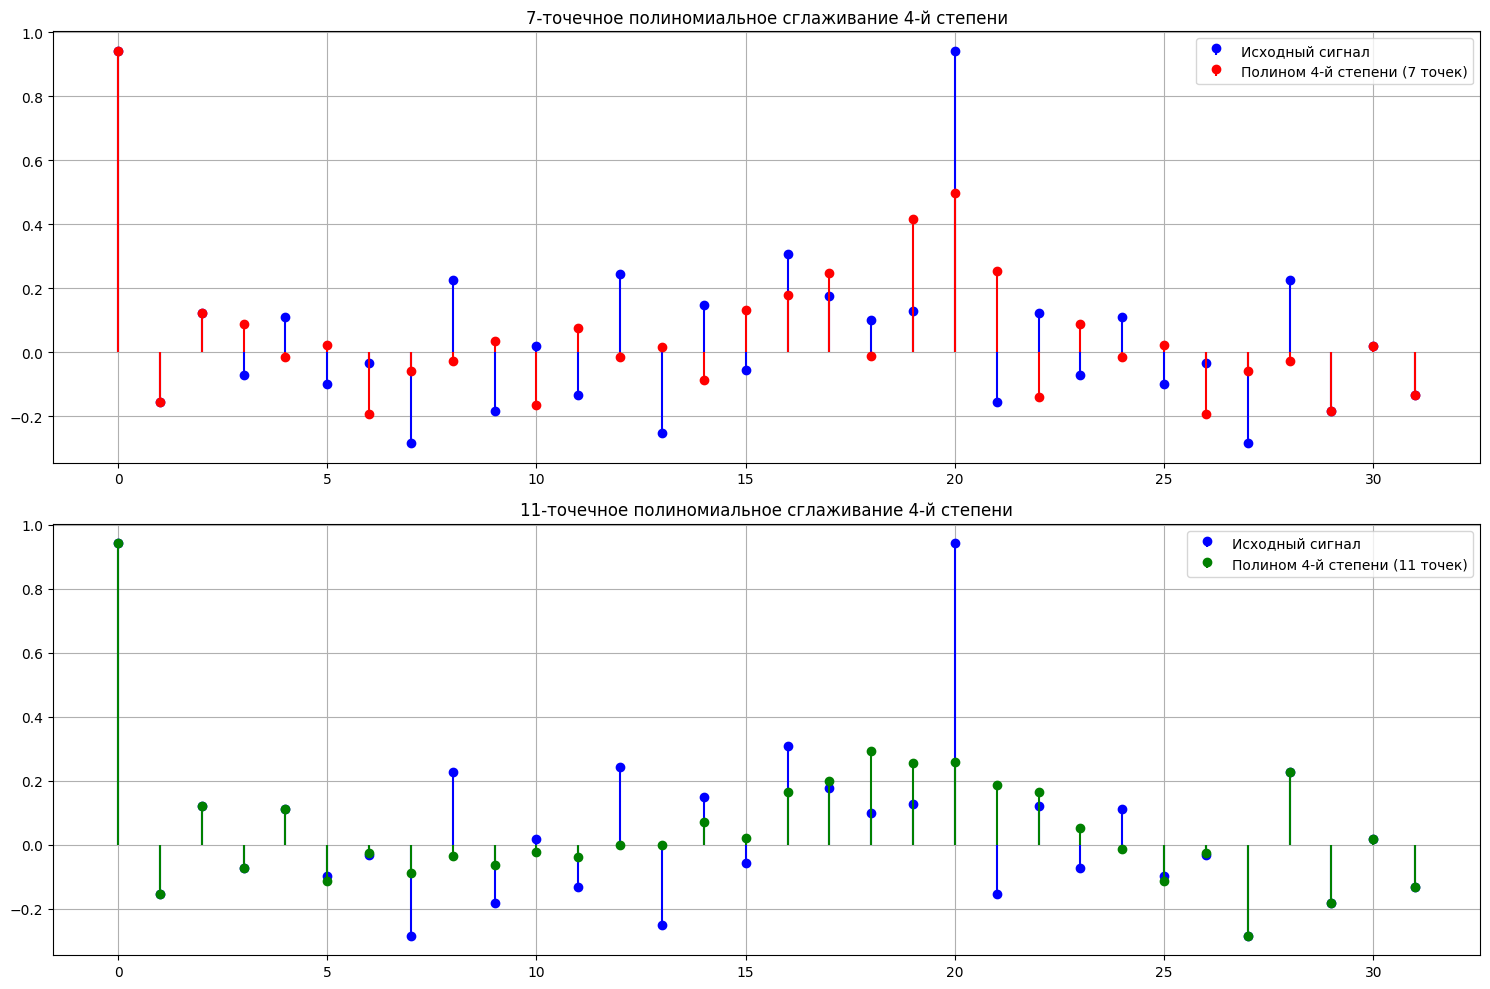

In [ ]:
# Применяем сглаживание
signal_smooth_poly7 = smooth_poly4_7points(signal)
signal_smooth_poly11 = smooth_poly4_11points(signal)

# Временная область
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_poly7, 'r', label='Полином 4-й степени (7 точек)', markerfmt='ro', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('7-точечное полиномиальное сглаживание 4-й степени')

plt.subplot(2, 1, 2)
plt.stem(t, signal, 'b', label='Исходный сигнал', markerfmt='bo', basefmt=" ")
plt.stem(t, signal_smooth_poly11, 'g', label='Полином 4-й степени (11 точек)', markerfmt='go', basefmt=" ")
plt.grid(True)
plt.legend()
plt.title('11-точечное полиномиальное сглаживание 4-й степени')

plt.tight_layout()
plt.show()

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

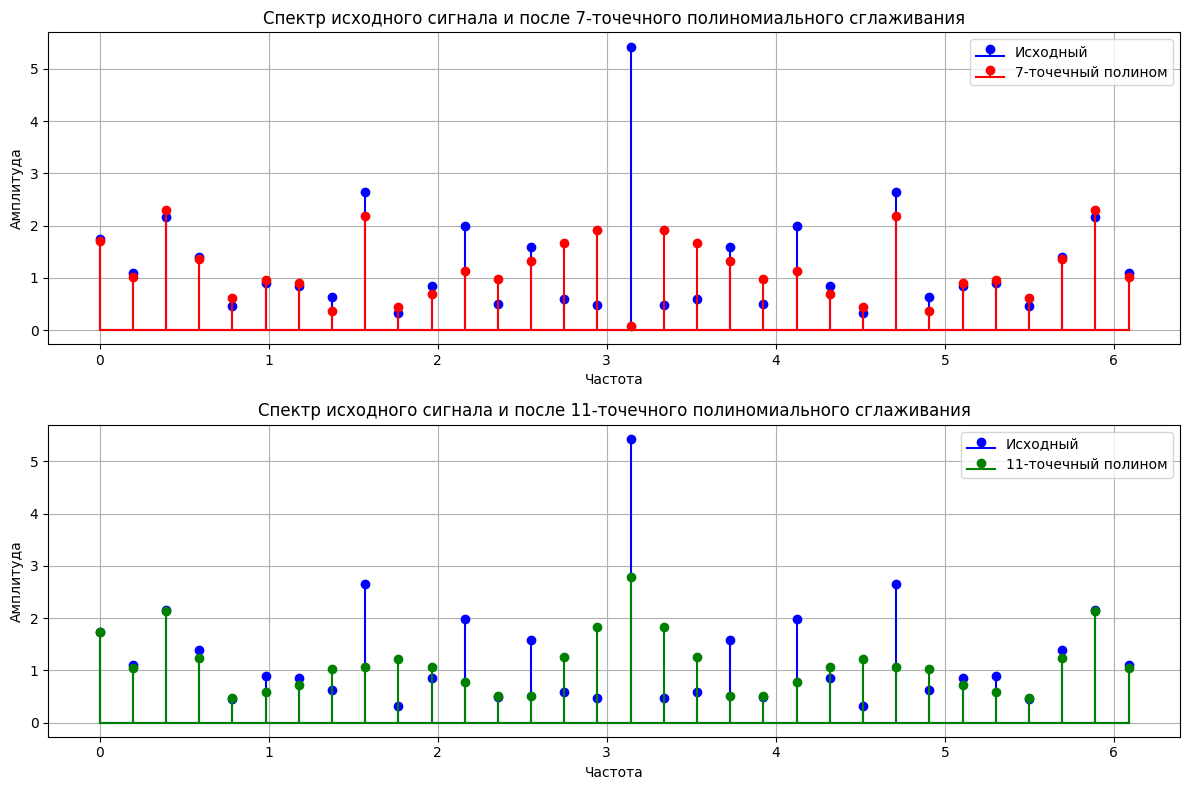

In [ ]:
spectrum_poly7 = np.fft.fft(signal_smooth_poly7)
spectrum_poly11 = np.fft.fft(signal_smooth_poly11)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_poly7), linefmt='r-', markerfmt='ro', basefmt='r-', label='7-точечный полином')
plt.title('Спектр исходного сигнала и после 7-точечного полиномиального сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_original), linefmt='b-', markerfmt='bo', basefmt='b-', label='Исходный')
plt.stem([2 * math.pi * i / (N + 1) for i in range(N + 1)], np.abs(spectrum_poly11), linefmt='g-', markerfmt='go', basefmt='g-', label='11-точечный полином')
plt.title('Спектр исходного сигнала и после 11-точечного полиномиального сглаживания')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


Для проведения анализа построим график передаточной функции ${H}(\omega)$ для сглаживания 2-ой степени дискретного сигнала

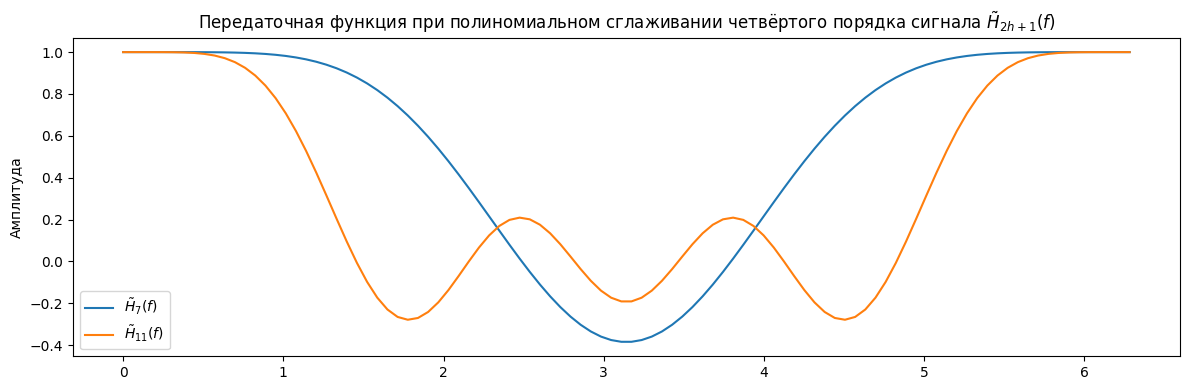

In [ ]:
def H_3(w, h):
  res = 15 * h ** 4 + 30 * h ** 3 - 35 * h ** 2 - 50 * h + 12
  for k in range(1, h + 1):
    res = res + 2 * (15 * h ** 4 + 30 * h ** 3 - 35 * h ** 2 - 50 * h + 12 - (70 * h ** 2 + 70 * h - 105) * k ** 2 + 63 * k ** 4) * math.cos(w * k)

  return 15 / (128 * h ** 5 + 320 * h ** 4 - 320 * h ** 3 - 800 * h ** 2 + 72 * h + 180) * res

plt.figure(figsize=(12, 4))

for i in [3, 5]:
  plt.plot(w, [H_3(w_i, i) for w_i in w], label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при полиномиальном сглаживании четвёртого порядка сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()

Как можно увидеть, график передаточной функции описывает процесс фильтрации с последующим разложением в спектр дисктретного сигнала. Нулевые частоты и близкие к ним не подавляются или подавляются незначительно, поэтому низкочастотные сигналы проходят через фильтр практически без изменений. Однако при высокочастотном сигнале происходит сильное подавление.

## Выводы

В ходе данной лабораторной работы был изучен метод дискретного преобразования Фурье. Данный метод позволяет раскладывать сигнал на гармоники и производить спектральный анализ частот. Были использованы фильтры полиномиального сглаживания с различными степенями.

Графики передаточных функций фильтров описывают разницу значений дискретных отсчётов спектра дискретного сигнала. Анализ спектра показал, что применяемые фильтры снижают амплитуду высоких частот, пропуская нижнечастотные без изменений. Также на спектре были обнаружены аномальные колебания в подавлении высоких частот при линейном сглаживании, что так же объясняется графиком передаточной функции, указывающим на явление Гиббса.